In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Define file path and parameters
fileFullPath = r'D:\Drone-Swarm-Detection-with-AWR2243\Our data\Radar_Data\metal_plate_distance_3m\master_0000_data.bin'
frameIdx = 50  # Index of the frame to read
numSamplePerChirp = 256  # Number of samples per chirp
numChirpPerLoop = 12  # Number of chirps per loop
numLoops = 64  # Number of loops per frame
numRXPerDevice = 4  # Number of receiving channels per device
numDevices = 4  # Number of devices in the cascade (if needed)

# Function to read binary radar data
def readBinFile(fileFullPath, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice):
    Expected_Num_SamplesPerFrame = numSamplePerChirp * numChirpPerLoop * numLoops * numRXPerDevice * 2
    with open(fileFullPath, 'rb') as fp:
        # Move to the desired frame in the file
        fp.seek((frameIdx - 1) * Expected_Num_SamplesPerFrame * 2)
        adcData1 = np.fromfile(fp, dtype=np.uint16, count=Expected_Num_SamplesPerFrame)

    # Convert the 16-bit data to signed integers
    neg = (adcData1 >> 15) == 1  # Check the sign bit
    adcData1 = adcData1.astype(np.int32)
    adcData1[neg] -= 2**16

    # Combine the I and Q channels into complex values
    adcData1 = adcData1[0::2] + 1j * adcData1[1::2]

    # Reshape and permute the data
    adcData1Complex = np.reshape(adcData1, (numRXPerDevice, numSamplePerChirp, numChirpPerLoop, numLoops), order='F')
    adcData1Complex = np.transpose(adcData1Complex, (1, 3, 0, 2))  # Permute dimensions
    return adcData1Complex

# Read radar data
adcDataComplex = readBinFile(fileFullPath, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice)

# Select antenna index and extract chirp ADC matrix
antennaIdx = 0  # Indexing starts from 0 in Python
chirp_ADC_matrix = adcDataComplex[:, :, antennaIdx, :]

# Display some results
print(adcDataComplex[1, 0, 0, 0])  # Display sample value
print("Size of chirp_ADC_matrix:", chirp_ADC_matrix.shape)

# Extract first chirp of the first loop
first_chirp_first_loop = chirp_ADC_matrix[:, 0, 0]
# Initialize an empty list to store each chirp
all_chirps = []

# Loop over loops and chirps per loop
for i in range(64):
    for j in range(12):
        # Append each chirp to the list
        all_chirps.append(chirp_ADC_matrix[:, i, j])

# Convert the list to a numpy array and reshape it to (768, 256)
all_chirps = np.array(all_chirps).reshape(768, 256)

# Display the size and some sample data
print("Size of the all_chirps matrix:", all_chirps.shape)
print("First chirp (first loop, first chirp):", all_chirps[767])


# print("Size of first_chirp_first_loop:", first_chirp_first_loop.shape[0])
# print(first_chirp_first_loop)
# # Reshape chirp_ADC_matrix to (768, 256)
# # We flatten the chirps across loops and chirps per loop into a single dimension (768 chirps total)
# chirps_matrix = np.reshape(chirp_ADC_matrix, (256,768))

# # Display the size and some sample data
# print("Size of the chirps matrix:", chirps_matrix.shape)
# print("First chirp (first loop, first chirp):", chirps_matrix[0])


(-242+126j)
Size of chirp_ADC_matrix: (256, 64, 12)
Size of the all_chirps matrix: (768, 256)
First chirp (first loop, first chirp): [ -88.+443.j -287.+195.j -515.+120.j -221.-272.j -302.-158.j   15.-211.j
  -20.-221.j  172.-151.j  213.+169.j -134.+152.j -216.+337.j -467.-238.j
  -91. -98.j  163.-426.j   94.+242.j  -27.+189.j -344.+273.j -544.-115.j
 -310.-354.j -256.-543.j  217.-362.j   44.-332.j  365.+178.j  140. +32.j
 -172.+304.j -228. -49.j -360.-190.j -181.-215.j  -40.-401.j  -27. -87.j
  157.-176.j -193. -98.j   25. -12.j  -80.-198.j -129.-221.j   -9.-271.j
  -59.-366.j  271.-142.j   80.-258.j   56.+298.j  -74.  -3.j -389.-156.j
  -67.-404.j  168.-356.j  207.-114.j  118. -39.j -357.-140.j   81.-268.j
  -26.-493.j  229.-110.j  177.-211.j  143.-110.j  260.-165.j  187.  -7.j
   33.+294.j -168.-161.j -397.-248.j  162.-552.j  236.-368.j  425. -42.j
   72. +52.j  -29. -51.j  100.-226.j  108.-322.j  230.+111.j   74.-279.j
  -53.-215.j  443.-443.j  494. +68.j  365.+396.j -290.+334.j -51

In [92]:
print(all_chirps.shape)

(768, 256)


[[ -41.+339.j  -57.+347.j  -41.+329.j ... -108.+455.j -106.+443.j
   -88.+443.j]
 [-242.+126.j -240.+113.j -244.+129.j ... -305.+183.j -306.+195.j
  -287.+195.j]
 [-402.+127.j -386.+109.j -368.+105.j ... -504.+132.j -513.+131.j
  -515.+120.j]
 ...
 [-228. +29.j -222. +34.j -218. +40.j ... -240. +35.j -239. +35.j
  -213. +20.j]
 [ -62.+125.j  -59.+117.j  -69.+126.j ...  -96.+112.j  -79.+111.j
   -89.+100.j]
 [-137.+272.j -146.+293.j -144.+261.j ... -166.+242.j -167.+247.j
  -176.+256.j]]


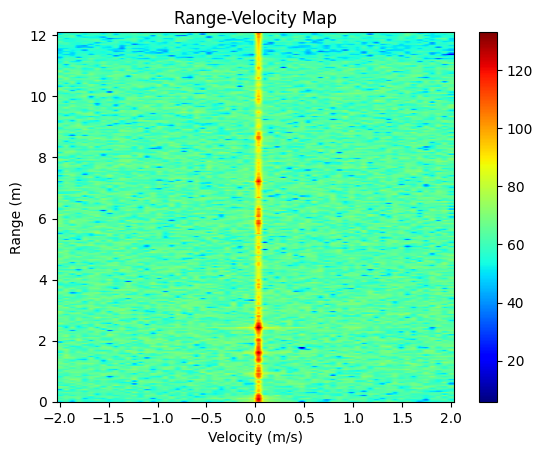

In [37]:
# Reshape the complex array into a matrix of shape (256, 768)
chirps_matrix = np.reshape(all_chirps, (256, 768))

# Output the reshaped matrix
print(chirps_matrix)
# Constants (adjust based on your radar parameters)
fc = 77e9  # Radar operating frequency (77 GHz for mmWave radar)
c = 3e8  # Speed of light (m/s)
sweepBandwidth = 3.16e9  # Bandwidth of the FMCW radar sweep (3.16 GHz)
chirpDuration = 40e-6  # Chirp duration (40 microseconds)

# Number of FFT points for the range dimension
Nfft_range = 2 ** int(np.ceil(np.log2(numSamplePerChirp)))

# Number of FFT points for the Doppler dimension
Nfft_doppler = 2 ** int(np.ceil(np.log2(numLoops)))

# Perform 2D FFT along both the range (ADC samples) and Doppler (chirps) dimensions
range_fft = np.fft.fft(chirps_matrix, Nfft_range, axis=0)  # FFT across range (ADC samples)
doppler_fft = np.fft.fftshift(np.fft.fft(range_fft, Nfft_doppler, axis=1), axes=1)  # FFT across Doppler (chirps), with shift

# Calculate the range and velocity axis values
range_res = c / (2 * sweepBandwidth)  # Range resolution (meters)
max_range = range_res * (Nfft_range - 1)  # Maximum measurable range
range_axis = np.linspace(0, max_range, Nfft_range)  # Range axis for plotting

doppler_res = 1 / (numLoops * chirpDuration*12)  # Doppler resolution (Hz)
max_doppler = doppler_res * (Nfft_doppler / 2)  # Maximum Doppler shift (Hz)

# Doppler axis for plotting (ensure symmetry around 0)
doppler_axis = np.linspace(-max_doppler, max_doppler, Nfft_doppler)

# Convert Doppler frequency to velocity (m/s)
velocity_axis = doppler_axis * (c / (2 * fc))  # Velocity axis using Doppler shift

# Plot the Range-Velocity map (absolute value of FFT)
plt.figure()
plt.imshow(20 * np.log10(np.abs(doppler_fft)), aspect='auto', extent=[velocity_axis[0], velocity_axis[-1], range_axis[0], range_axis[-1]], origin='lower', cmap='jet')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Range (m)')
plt.title('Range-Velocity Map')
plt.colorbar()

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Define file path and parameters
fileFullPath = r'E:\Data_Set\Phanton_4_backword_01\new_three\master_0000_data.bin'
frameIdx = 120 # Index of the frame to read
numSamplePerChirp = 256  # Number of samples per chirp
numChirpPerLoop = 12  # Number of chirps per loop
numLoops = 128 # Number of loops per frame
numRXPerDevice = 4  # Number of receiving channels per device
numDevices = 4  # Number of devices in the cascade (if needed)

# Function to read binary radar data
def readBinFile(fileFullPath, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice):
    Expected_Num_SamplesPerFrame = numSamplePerChirp * numChirpPerLoop * numLoops * numRXPerDevice * 2
    with open(fileFullPath, 'rb') as fp:
        # Move to the desired frame in the file
        fp.seek((frameIdx - 1) * Expected_Num_SamplesPerFrame * 2)
        adcData1 = np.fromfile(fp, dtype=np.uint16, count=Expected_Num_SamplesPerFrame)

    # Convert the 16-bit data to signed integers
    neg = (adcData1 >> 15) == 1  # Check the sign bit
    adcData1 = adcData1.astype(np.int32)
    adcData1[neg] -= 2**16

    # Combine the I and Q channels into complex values
    adcData1 = adcData1[0::2] + 1j * adcData1[1::2]

    # Reshape and permute the data
    adcData1Complex = np.reshape(adcData1, (numRXPerDevice, numSamplePerChirp, numChirpPerLoop, numLoops), order='F')
    adcData1Complex = np.transpose(adcData1Complex, (1, 3, 0, 2))  # Permute dimensions
    return adcData1Complex

# Read radar data
adcDataComplex = readBinFile(fileFullPath, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice)

# Select antenna index and extract chirp ADC matrix
antennaIdx = 0  # Indexing starts from 0 in Python
chirp_ADC_matrix = adcDataComplex[:, :, antennaIdx, :]

# Display some results
print(adcDataComplex[1, 0, 0, 0])  # Display sample value
print("Size of chirp_ADC_matrix:", chirp_ADC_matrix.shape)

# Extract first chirp of the first loop
first_chirp_first_loop = chirp_ADC_matrix[:, 0, 0]
all_chirps=chirp_ADC_matrix[:,:,:]
print("Size of the all chirps matrix",all_chirps.shape)
print("Size of first_chirp_first_loop:", first_chirp_first_loop.shape[0])
print(first_chirp_first_loop)
# Reshape the complex array into a matrix of shape (256,  1536)
chirps_matrix = np.reshape(all_chirps, (256, 1536))
print(chirps_matrix.shape[0])

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Data_Set\\Phanton_4_backword_01\\new_three\\master_0000_data.bin'

[[  22. -59.j   80.+146.j    0. +37.j ...  -20. +83.j   -3. -92.j
  -448. -68.j]
 [  28. -66.j  115.+269.j   35. -53.j ... -117. +82.j   -1. -98.j
  -555.-102.j]
 [  38. -78.j   86.+309.j   31.-111.j ...  -98. +45.j  -77. -53.j
  -563. -77.j]
 ...
 [  41.  +6.j   53. +37.j   27. -17.j ...  -65. +64.j   52. +45.j
    15. +58.j]
 [  48. +34.j    0. +16.j   34. -11.j ...  -44. +49.j  -14. +30.j
   -57. +45.j]
 [  17. +25.j   56.  +4.j   24.  -3.j ...  -35.  -8.j  -22. +32.j
   -43. -12.j]]
128
1388.888888888889
2.705627705627706
32.467532467532465


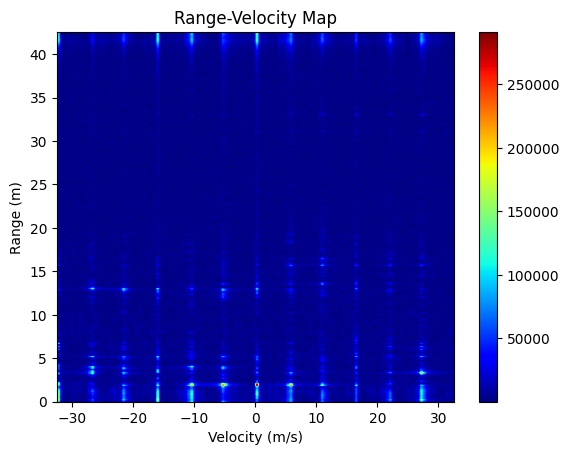

In [66]:
# Reshape the complex array into a matrix of shape (256,  1536)
chirps_matrix = np.reshape(all_chirps, (256, 1536))

# Output the reshaped matrix
print(chirps_matrix)
# Constants (adjust based on your radar parameters)
fc = 77e9  # Radar operating frequency (77 GHz for mmWave radar)
c = 3e8  # Speed of light (m/s)
sweepBandwidth = 0.899451e9; # Bandwidth of the FMCW radar sweep (3.16 GHz)
chirpDuration = 30e-6  # Chirp duration (40 microseconds)

# Number of FFT points for the range dimension
Nfft_range = 2 ** int(np.ceil(np.log2(numSamplePerChirp)))


# Number of FFT points for the Doppler dimension
Nfft_doppler = 2 ** int(np.ceil(np.log2(numLoops)))
print(Nfft_doppler)

# Perform 2D FFT along both the range (ADC samples) and Doppler (chirps) dimensions
range_fft = np.fft.fft(chirps_matrix, Nfft_range, axis=0)  # FFT across range (ADC samples)
doppler_fft = np.fft.fftshift(np.fft.fft(range_fft, Nfft_doppler, axis=1), axes=1)  # FFT across Doppler (chirps), with shift

# Calculate the range and velocity axis values
range_res = c / (2 * sweepBandwidth)  # Range resolution (meters)
max_range = range_res * (Nfft_range - 1)  # Maximum measurable range
range_axis = np.linspace(0, max_range, Nfft_range)  # Range axis for plotting

doppler_res = 1 / (numLoops * chirpDuration*12)  # Doppler resolution (Hz)
max_doppler = doppler_res * (Nfft_doppler / 2)  # Maximum Doppler shift (Hz)
print(max_doppler)
maximumVelocity=(c/fc)/(chirpDuration*4)
velocity_res=(c/fc)/(numLoops * chirpDuration*12) #velocity resolution
# Doppler axis for plotting (ensure symmetry around 0)
doppler_axis = np.linspace(-max_doppler, max_doppler, Nfft_doppler)

# Convert Doppler frequency to velocity (m/s)
velocity_axis = doppler_axis * (c / (2 * fc))  # Velocity axis using Doppler shift
print(np.max(velocity_axis))
print(maximumVelocity)
velocity_axis=velocity_axis*32.46/2.7
# Plot the Range-Velocity map (absolute value of FFT)
plt.figure()
plt.imshow((np.abs(doppler_fft)), aspect='auto', extent=[velocity_axis[0], velocity_axis[-1], range_axis[0], range_axis[-1]], origin='lower', cmap='jet')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Range (m)')
plt.title('Range-Velocity Map')
plt.colorbar()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 2) + inhomogeneous part.

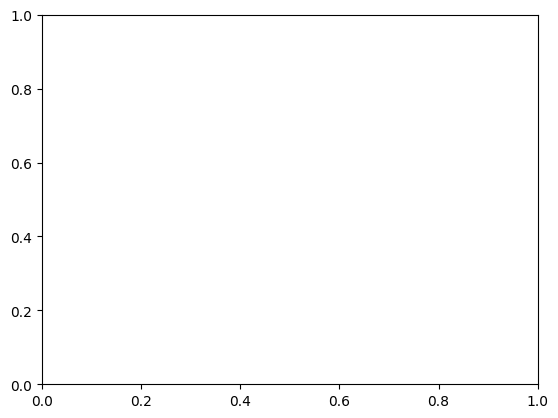

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming all_chirps is already defined and contains the complex array data
# Reshape the complex array into a matrix of shape (256, 1536)
chirps_matrix = np.reshape(all_chirps, (256, 1536))

# Constants (adjust based on your radar parameters)
fc = 77e9  # Radar operating frequency (77 GHz for mmWave radar)
c = 3e8  # Speed of light (m/s)
sweepBandwidth = 0.899451e9  # Bandwidth of the FMCW radar sweep (899.451 MHz)
chirpDuration = 30e-6  # Chirp duration (30 microseconds)
numSamplePerChirp = 256  # Number of ADC samples per chirp
numLoops = 128  # Number of chirps

# Number of FFT points for the range dimension
Nfft_range = 2 ** int(np.ceil(np.log2(numSamplePerChirp)))

# Number of FFT points for the Doppler dimension
Nfft_doppler = 2 ** int(np.ceil(np.log2(numLoops)))

# Perform 2D FFT along both the range (ADC samples) and Doppler (chirps) dimensions
range_fft = np.fft.fft(chirps_matrix, Nfft_range, axis=0)  # FFT across range (ADC samples)
doppler_fft = np.fft.fftshift(np.fft.fft(range_fft, Nfft_doppler, axis=1), axes=1)  # FFT across Doppler (chirps), with shift

# Calculate the range axis
range_res = c / (2 * sweepBandwidth)  # Range resolution (meters)
max_range = range_res * (Nfft_range - 1)  # Maximum measurable range
range_axis = np.linspace(0, max_range, Nfft_range)

# Calculate velocity axis
velocity_res = (c / fc) / (numLoops * chirpDuration)  # Velocity resolution (m/s)
maximumVelocity = (c / fc) / (4 * chirpDuration)  # Maximum velocity (m/s)
velocity_axis = np.linspace(-maximumVelocity, maximumVelocity, Nfft_doppler)

# Plot the Range-Velocity map (absolute value of FFT)
plt.figure()
plt.imshow(np.abs(doppler_fft), aspect='auto', extent=[velocity_axis, velocity_axis[-1], range_axis, range_axis[-1]], origin='lower', cmap='jet')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Range (m)')
plt.title('Range-Velocity Map')
plt.colorbar(label='Magnitude')
plt.show()


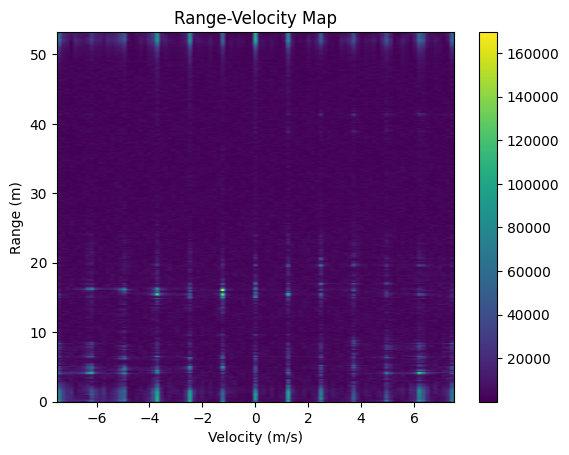

In [60]:
Nfft_range = 320  # Number of FFT points for range dimension
Nfft_doppler = 97# Number of FFT points for Doppler dimension

# Perform 2D FFT along both the range (ADC samples) and Doppler (chirps) dimensions
range_fft = np.fft.fft(chirps_matrix, Nfft_range, axis=0)  # FFT across range (ADC samples)
doppler_fft = np.fft.fftshift(np.fft.fft(range_fft, Nfft_doppler, axis=1), axes=1)  # FFT across Doppler (chirps), with shift

# Calculate the range and velocity axis values
range_res = c / (2 * sweepBandwidth)  # Range resolution (meters)
max_range = range_res * (Nfft_range - 1)  # Maximum measurable range
range_axis = np.linspace(0, max_range, Nfft_range)  # Range axis for plotting

doppler_res = 1 / (numChirpPerLoop * chirpDuration*35)  # Doppler resolution (Hz)
max_doppler = doppler_res * (Nfft_doppler / 2)  # Maximum Doppler shift (Hz)

# Doppler axis for plotting (ensure symmetry around 0)
doppler_axis = np.linspace(-max_doppler, max_doppler, Nfft_doppler)

# Convert Doppler frequency to velocity (m/s)
velocity_axis = doppler_axis * (c / (2 * fc))  # Velocity axis using Doppler shift

# Plot the Range-Velocity map (absolute value of FFT)
plt.figure()
plt.imshow((np.abs(doppler_fft)), aspect='auto', extent=[velocity_axis[0], velocity_axis[-1], range_axis[0], range_axis[-1]], origin='lower')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Range (m)')
plt.title('Range-Velocity Map')
plt.colorbar()